In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f'The Shape of the Dataset is : {data.shape}')

The Shape of the Dataset is : (200, 5)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.drop('CustomerID',axis = 1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
data_missings = data.isna().sum()
data_missings = data_missings[data_missings>0]
if data_missings.empty:
    print('The Dataset Is Free From Missings')
else:
    print(f'The Dataset Has Missings in the following Features : {data_missings.index}')

The Dataset Is Free From Missings


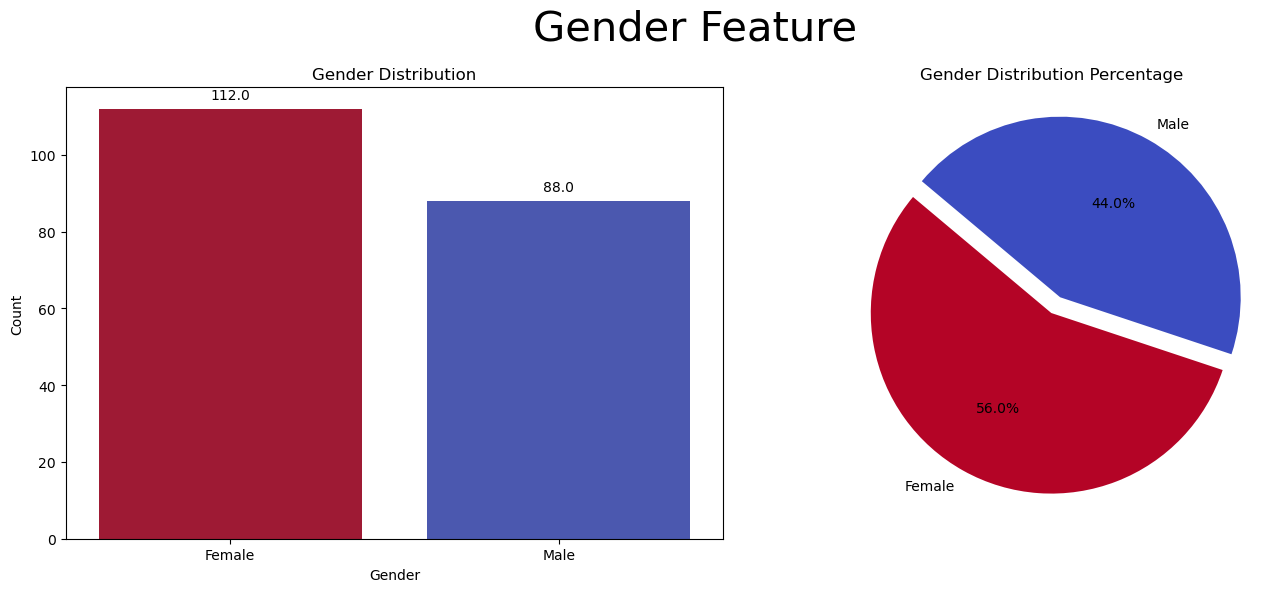

In [8]:

gender_counts = data['Gender'].value_counts()
total_counts = gender_counts.sum()
gender_percentages = (gender_counts / total_counts) * 100
norm = plt.Normalize(gender_counts.min(), gender_counts.max())
colors = plt.cm.coolwarm(norm(gender_counts.values))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Gender Feature',fontsize=30)
bars = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors, ax=ax1)
ax1.set_title('Gender Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
for bar in bars.patches:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
explode = [0.1 if pct == gender_percentages.min() else 0 for pct in gender_percentages]
ax2.pie(gender_percentages, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.coolwarm(norm(gender_counts.values)))
ax2.set_title('Gender Distribution Percentage')
plt.tight_layout()
plt.show()

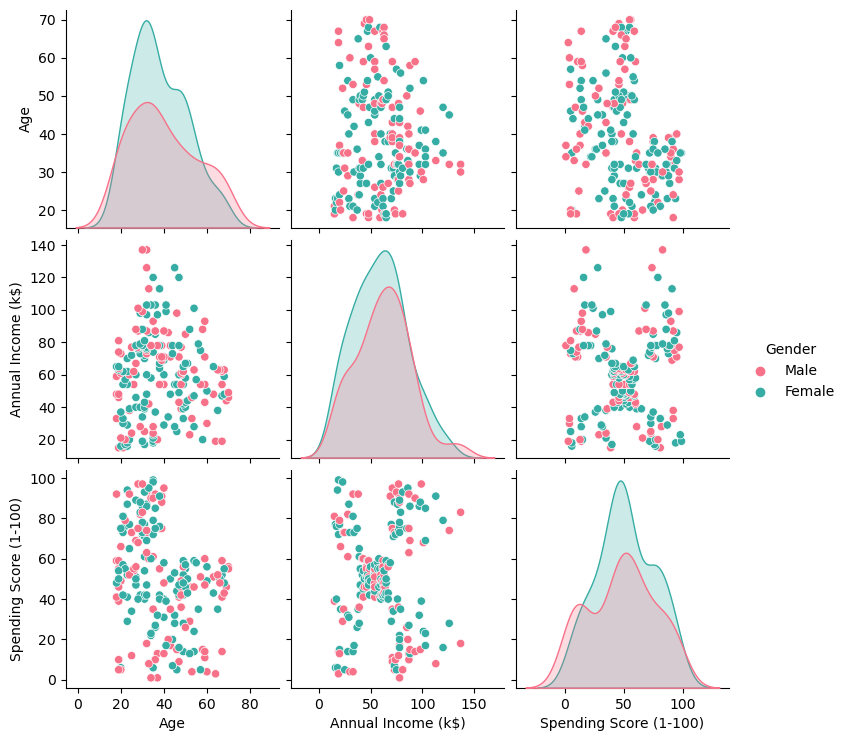

In [9]:
sns.pairplot(data,hue="Gender",palette='husl')
plt.show()

In [10]:
plt.style.use('fivethirtyeight')

In [11]:
def elbow_method(X_scaled):
    
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    return wcss

In [12]:
def plot_elbow(wcss,point=0):
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#44AA99', markersize=8)
    plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.xticks(range(1, 11), fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.7)
    if point != 0:
        plt.axvline(x=point, color='r', linestyle='--')  

    plt.tight_layout()

In [13]:
def scatter_clusters(y_kmeans,X_scaled,X,val):
    # Plot the clusters
    plt.figure(figsize=(10, 6))

    
    colors = ['y', 'orange', 'b', 'c'] if val == 4 else ['y', 'orange', 'b', 'c','g']

    for i in range(val):
        plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], 
                    s=100, c=colors[i], label=f'Cluster {i+1}')

    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', label='Centroids',marker='x')

    plt.title('Clusters of Customers', fontsize=15, fontweight='bold')
    plt.xlabel(f'{X.columns[0]}', fontsize=12)
    plt.ylabel(f'{X.columns[1]}', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.tight_layout()

    plt.show()

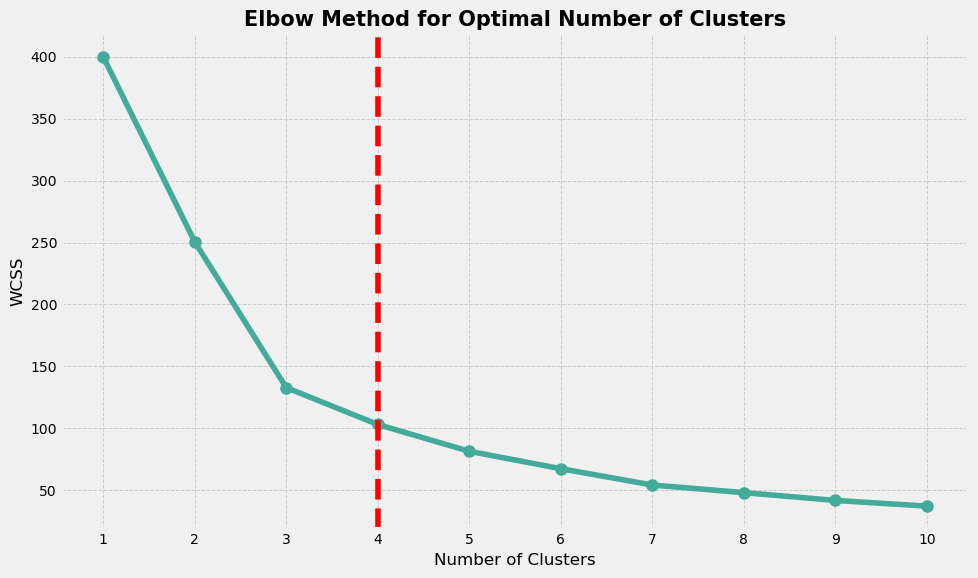

In [14]:

X1 = data[['Age', 'Annual Income (k$)']]
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

wcss1 = elbow_method(X1_scaled)

plot_elbow(wcss1,4)

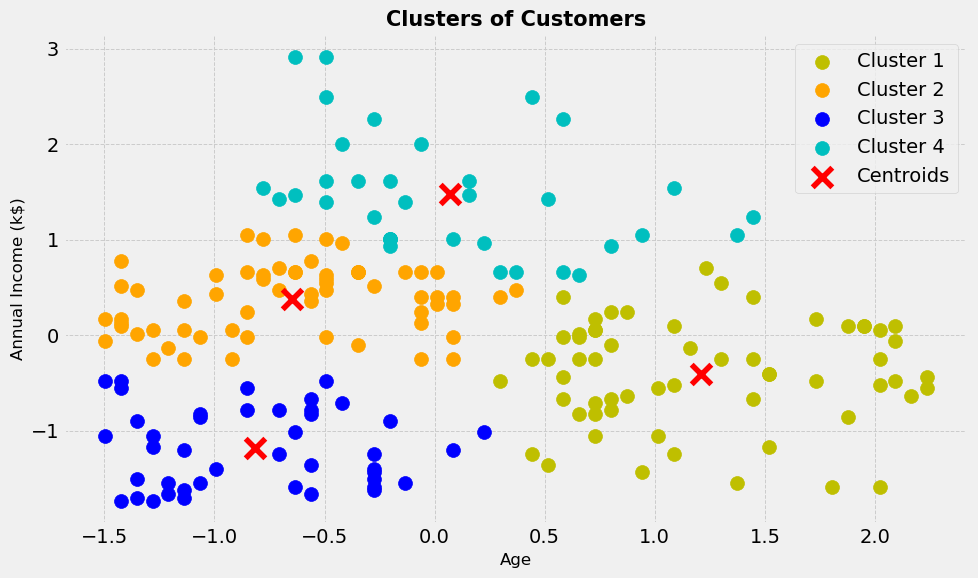

In [15]:

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans1 = kmeans.fit_predict(X1_scaled)

scatter_clusters(y_kmeans1,X1_scaled,X1,4)

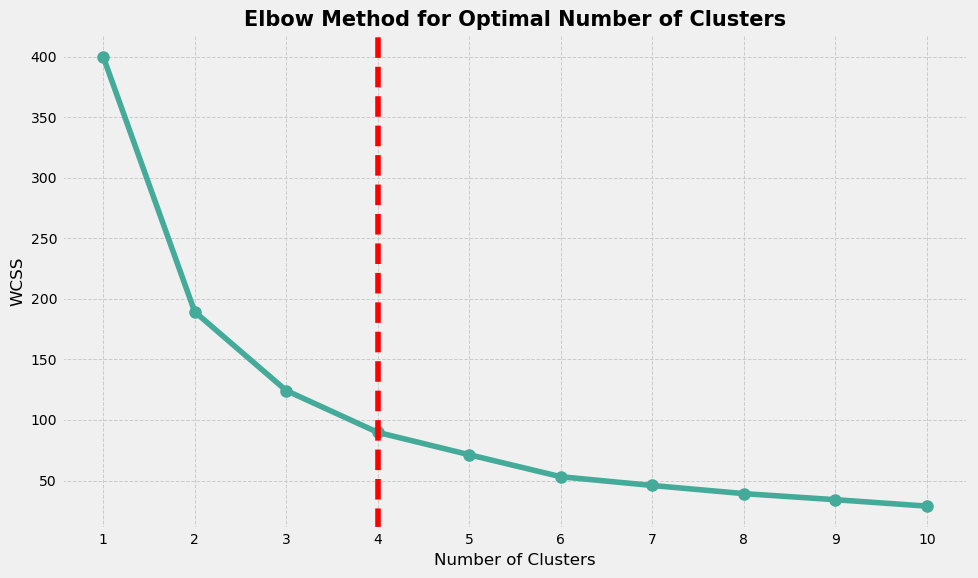

In [16]:

X2 = data[['Age', 'Spending Score (1-100)']]

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)


wcss2 = elbow_method(X2_scaled)

plot_elbow(wcss2,4)

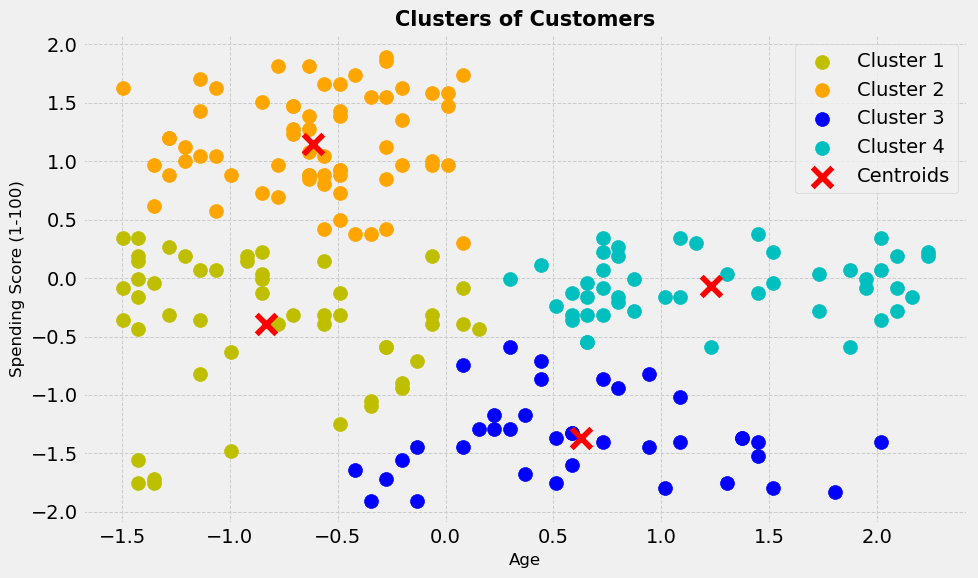

In [17]:

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans2 = kmeans.fit_predict(X2_scaled)

scatter_clusters(y_kmeans2,X2_scaled,X2,4)

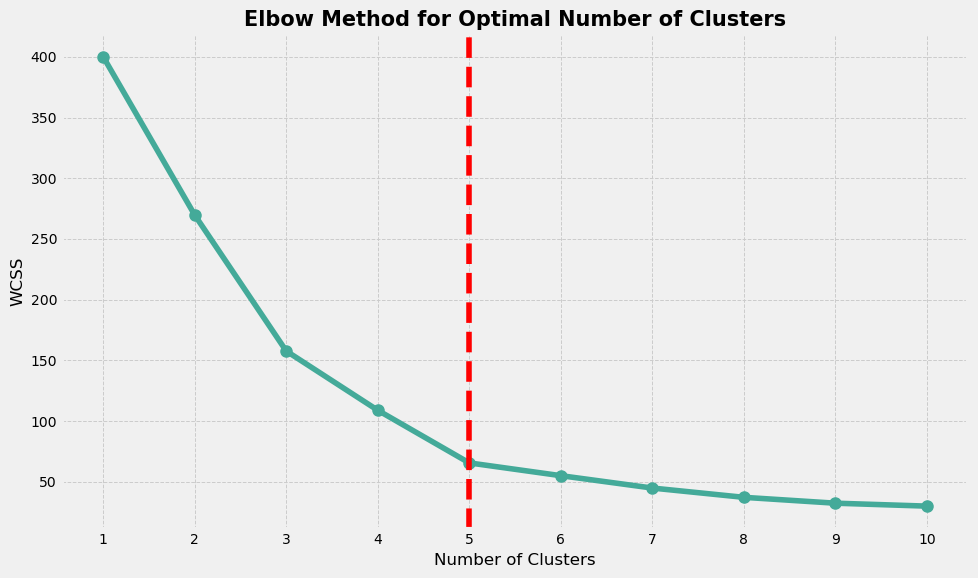

In [18]:

X3 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)
wcss3 = elbow_method(X3_scaled)

plot_elbow(wcss3,5)

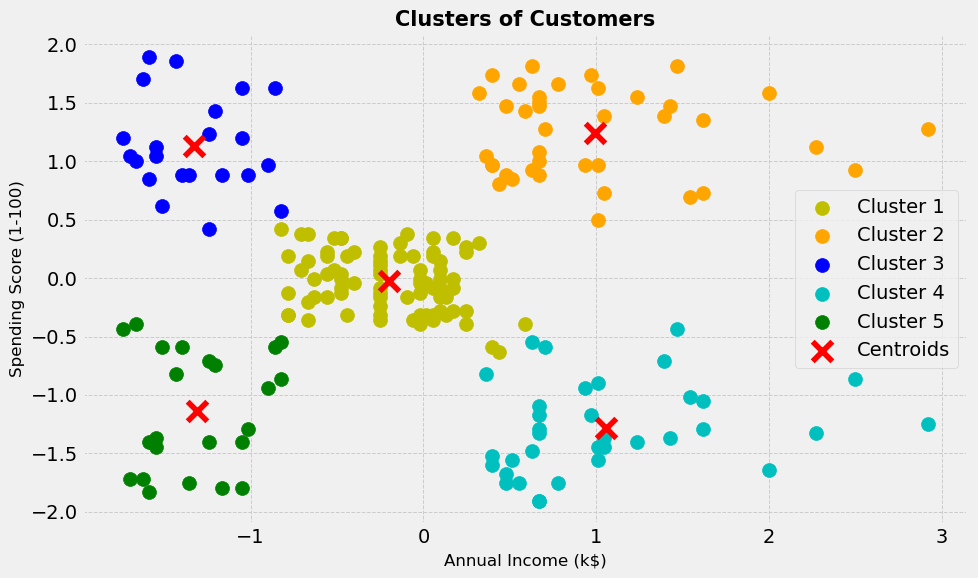

In [19]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans3 = kmeans.fit_predict(X3_scaled)

scatter_clusters(y_kmeans3,X3_scaled,X3,5)

In [20]:

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled.shape

(200, 4)

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [23]:
X_pca.shape

(200, 2)

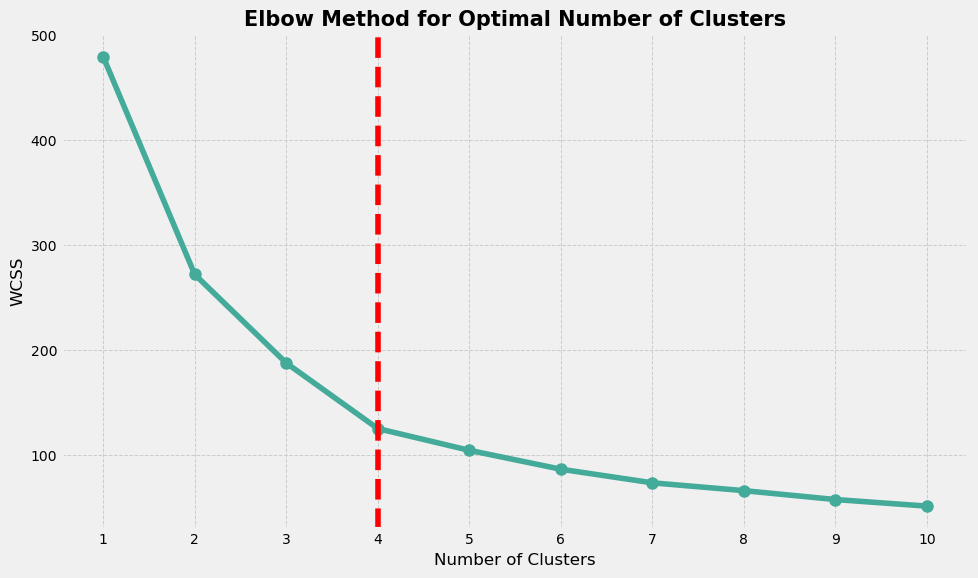

In [24]:
wcss = elbow_method(X_pca)
plot_elbow(wcss,4)

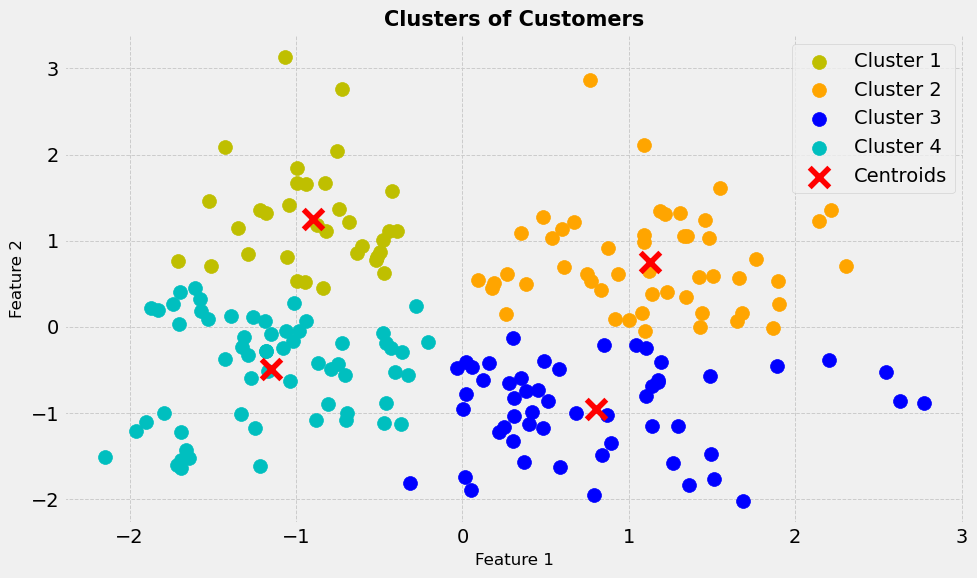

In [25]:
X = pd.DataFrame(X_pca,columns=['Feature 1','Feature 2'])


kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)


scatter_clusters(y_kmeans,X_pca,X,4)